In [1]:
from math import *
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations

Constants

In [13]:
count_points = 20
alpha = 0.5

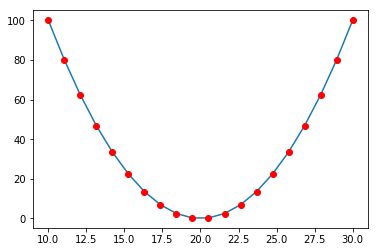

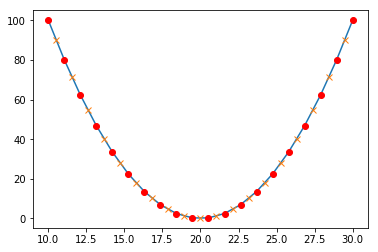

In [12]:
y = lambda x: pow((x-20),2)
data = np.array([(i,y(i)) for i in np.linspace(10.,30.,count_points)])
data_colocation = np.array([(data[i]+data[i+1])/2 for i in range(len(data)-1) ])

plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.show()

plt.plot(data[:,0],data[:,1])
plt.plot(data[:,0],data[:,1],'ro')
plt.plot(data_colocation[:,0],data_colocation[:,1],'x')
plt.show()

In [4]:
def speed(x,y,t):
    res = 0
    for j in range(count_points):
        res=Gamma(j)*speed_p(x,y,x,y)
    return res
def Gamma(j):
    return j
def speed_p(x,y,x0,y0):
    return (y0-y/(2*pi),x-x0/(2*pi))

In [5]:
test = np.random.uniform(low=0, high=1, size=(40,40))#rand(10,10)

In [6]:
y = np.array([[1,1,1],[2,3,4],[3,3,1]])
x = np.array([2,1,4])
y.dot(x)

array([ 7, 23, 13])

In [7]:
b = np.random.uniform(low=0, high=1, size=(count_points*2))
np.linalg.solve(test,b)

array([ 4.32515957e+00,  3.92885227e+00, -1.69569814e+00, -2.93350383e+00,
       -1.06878423e-01, -1.13594766e+00, -1.45170510e-01, -3.54260145e+00,
       -8.66105142e-01,  4.00497777e+00, -5.62614579e-01,  1.93699283e+00,
       -3.28764931e-01, -7.01509502e-01, -8.45821661e+00,  2.96130691e-03,
        2.27812112e+00,  4.83042774e-01,  3.59702560e+00, -2.82957366e+00,
        3.15580813e+00,  2.65868054e-01, -1.47548568e+00, -3.68336394e+00,
       -1.94264246e-01, -3.16859832e+00,  2.15045346e-01,  1.12677206e+00,
        2.05481412e+00, -4.62723172e-01, -3.42868938e+00,  2.55420620e+00,
        6.68165393e+00, -5.41148002e+00,  4.66847277e+00, -1.76362552e-01,
       -4.94851944e-01, -4.54485584e-01, -9.70001246e-01,  2.54338869e+00])

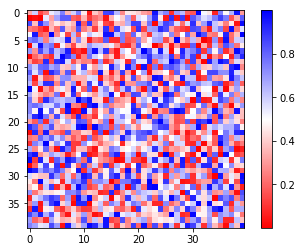

In [9]:
cmap = mcolors.LinearSegmentedColormap.from_list('colormap', ('red', 'white', 'blue'))
plt.imshow(test, cmap=cmap)
plt.colorbar()
#plt.imshow(test, cmap=cmap)

In [ ]:
def tau(array,j):
    return (array[0,j+1] - array[0,j])/(sqrt(pow((array[0,j+1] - array[0,j]),2)+pow((),2)))
    